<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#План-работы" data-toc-modified-id="План-работы-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>План работы</a></span></li></ul></li><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ исходных данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-данных-к-обучению" data-toc-modified-id="Подготовка-данных-к-обучению-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных к обучению</a></span><ul class="toc-item"><li><span><a href="#Ресемплирование" data-toc-modified-id="Ресемплирование-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Ресемплирование</a></span></li><li><span><a href="#Сезонность-и-тренды" data-toc-modified-id="Сезонность-и-тренды-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сезонность и тренды</a></span></li><li><span><a href="#Создание-признаков-и-выборок-для-обучения" data-toc-modified-id="Создание-признаков-и-выборок-для-обучения-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Создание признаков и выборок для обучения</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовых-данных" data-toc-modified-id="Проверка-модели-на-тестовых-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовых данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Прогнозирование заказов такси

## Описание проекта

### Цель проекта

Целью проекта является разработка модели машинного обучения, которая сможет предсказывать количество заказов на следующий час для компании "Чётенькое такси".

Для обучения модели имеются исходные данные от заказчика в виде таблицы с историческими данными о заказах такси в аэропортах.

### План работы

Решение поставленной задачи начнём со знакомства с исходными данными.

Выполним преодбработку данных, подготовим их к обучению.

Далее построим несколько моделей. Качество моделей будем оценивать с помощью метрики *RMSE* библиотеки *sklearn*.

Согласно требованию заказчика, метрика *RMSE* построенной модели должна быть не выше 48.

## Анализ исходных данных

### Импорт библиотек

In [10]:
import os

import pandas as pd
import numpy as np
import pylab as pl

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

### Загрузка данных

Согласно техническому заданию в исходной таблице имеются две колонки: даты и количество заказов.

Загрузим исходную таблицу так, чтобы тип данных в столбце был преобразован в *datetime64* и этот столбец стал индексом. Для этого методу *read_csv* передадим аргументы *parse_dates* и *index_col*.

In [11]:
# loading data
pth1 = 'D:\\Python\\Проекты\\Спринт15_время\\taxi.csv'
df = pd.read_csv(pth1, parse_dates=['datetime'], index_col='datetime')

### Анализ данных

Получим общую информацию по датасету.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Исходный датасет содержит более 26 тысячи строк. Данные представлены для весенних и летних месяцев 2018 года.

Выведем на экран верхние строки таблицы.

In [13]:
df.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


Проверим хронологический порядок записи объектов.

In [14]:
df.index.is_monotonic

True

Посмотрим как распределены заказы.

In [15]:
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


Построим гистограммы.

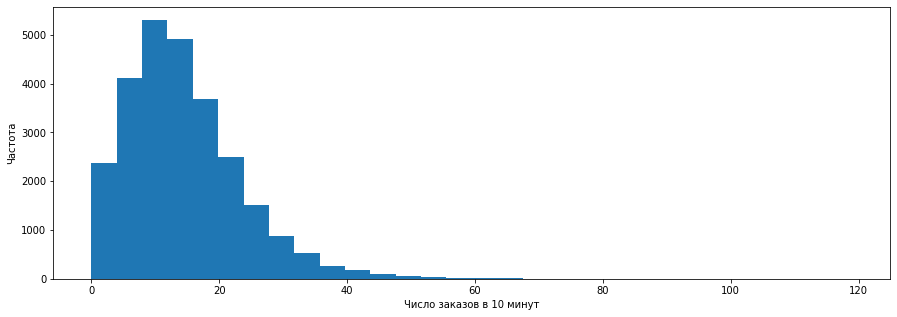

In [16]:
df['num_orders'].plot(kind='hist', bins=30, figsize=(15, 5));

pl.xlabel('Число заказов в 10 минут');
pl.ylabel('Частота');

Построим график распределения заказов по времени.

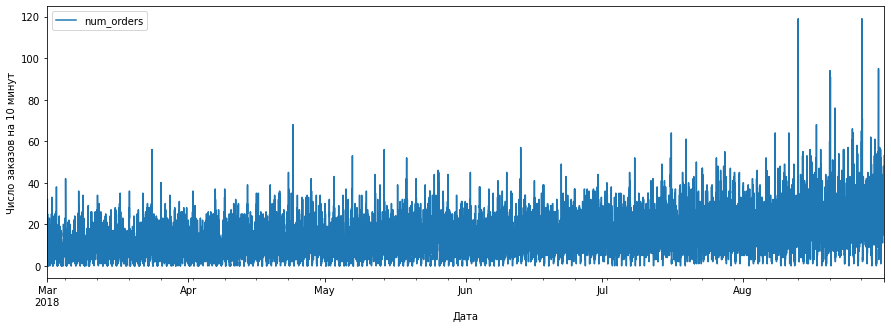

In [17]:
df.plot(figsize=(15,5));

pl.xlabel('Дата');
pl.ylabel('Число заказов на 10 минут');

### Вывод

Исходный датасет представляет собой таблицу из двух срток и более 26 тысяч строк с данными о заказах такси. Количество заказов приведено на каждые десять минут периода с марта по август 2018 года.

В ходе анализа данных индексы датасета заменены столбцом с датами.

Данные по заказам такси приведены в хронологическом порядке.

## Подготовка данных к обучению

### Ресемплирование

Сгруппируем данные по каждому часу.

In [18]:
df = df.resample('1H').sum()

Построим график распределения заказов по часам.

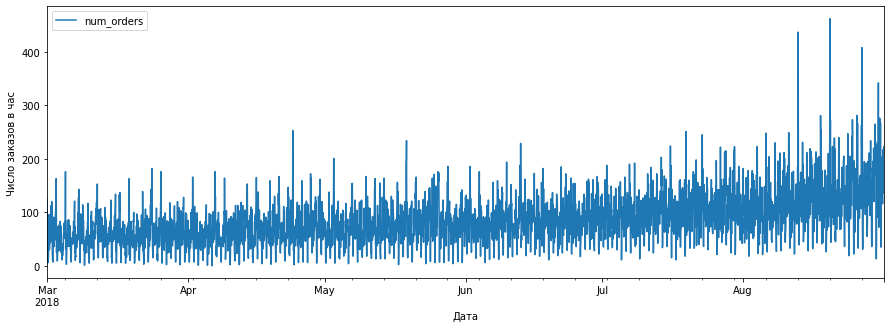

In [19]:
df.plot(figsize=(15,5));

pl.xlabel('Дата');
pl.ylabel('Число заказов в час');

График такой же нечитаемый.

Более наглядным получится график по скользящему среднему количества заказов.

### Сезонность и тренды

Разложим временной ряд на составляющие: тренд, сезонность и остаток с помощью модуля *tsa.seasonal* библиотеки *statsmodels* и построим соответствующие графики.

In [20]:
# decomposing time series
decomposed = seasonal_decompose(df)

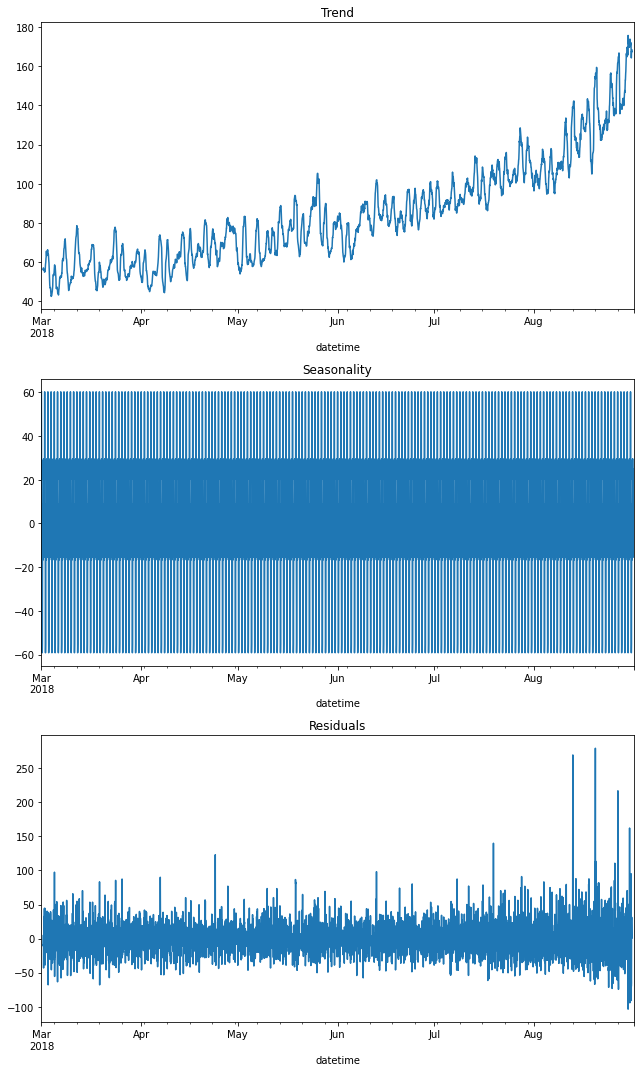

In [21]:
# setting plot size
plt.figure(figsize=(9, 15))

# plotting Trend
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')

# plotting Seasonality
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')

# plotting Residuals
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')

plt.tight_layout()

### Создание признаков и выборок для обучения

Напишем функцию `make_samples`, которая создаст следующие признаки:
* календарные признаки;
* "отстающие значения";
* скользящее среднее.

Функция будет возвращать обучающую, валидационную и тестовую выборки. Значение аргументу *test_size* метода *train_test_split* зададим 0.1.

На вход функция будет принимать исходный датасет, максимальный размер отставания и интервал усреднения.

In [22]:
def make_samples(df, max_lag, roll_size):
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    
    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)
        
    df['rolling_mean'] = df['num_orders'].shift().rolling(roll_size).mean()
    
    train, test = train_test_split(df, shuffle=False, test_size=0.1)
    
    train, valid = train_test_split(train, shuffle=False, test_size=0.1)
    
    train = train.dropna()
    
    features_train = train.drop('num_orders', axis = 1)
    features_valid = valid.drop('num_orders', axis = 1)
    features_test = test.drop('num_orders', axis = 1)
    target_train = train['num_orders']
    target_valid = valid['num_orders']
    target_test = test['num_orders']
      
    return features_train, target_train, features_valid, target_valid, features_test, target_test

Создадим с помощью функции `make_samples` выборки для обучения моделей.

В ходе исследования путём перебора значений были установлены оптимальный размер окна для признака "скользящее среднее" и количество "отстающих" признаков. Передадим полученные величины в качестве аргумента функции `make_samples`.

Выведем на экран размер выборок с признаками.

In [23]:
# creating train, validation and test samples using function
features_train, target_train, features_valid, target_valid, features_test, target_test = make_samples(df, 24, 48)

# getting the shape of samples 
features_train.shape, features_valid.shape, features_test.shape

((3528, 27), (398, 27), (442, 27))

Проверим корректность деления исходного датасета на выборки.

Выборки должны быть поделены в хронологическом порядке: сначала должны идти обучающие данные, затем - валидационные и в конце - тестовые.

In [24]:
# viewing end of the train sample
features_train[['dayofweek', 'hour']].tail()

,dayofweek,hour
datetime,,
2018-07-27 19:00:00,4,19
2018-07-27 20:00:00,4,20
2018-07-27 21:00:00,4,21
2018-07-27 22:00:00,4,22
2018-07-27 23:00:00,4,23


In [25]:
# viewing top of the validation sample
features_valid[['dayofweek', 'hour']].head()

,dayofweek,hour
datetime,,
2018-07-28 00:00:00,5,0
2018-07-28 01:00:00,5,1
2018-07-28 02:00:00,5,2
2018-07-28 03:00:00,5,3
2018-07-28 04:00:00,5,4


In [26]:
# viewing end of the validation sample
features_valid[['dayofweek', 'hour']].tail()

,dayofweek,hour
datetime,,
2018-08-13 09:00:00,0,9
2018-08-13 10:00:00,0,10
2018-08-13 11:00:00,0,11
2018-08-13 12:00:00,0,12
2018-08-13 13:00:00,0,13


In [27]:
# viewing top of the test sample
features_test[['dayofweek', 'hour']].head()

,dayofweek,hour
datetime,,
2018-08-13 14:00:00,0,14
2018-08-13 15:00:00,0,15
2018-08-13 16:00:00,0,16
2018-08-13 17:00:00,0,17
2018-08-13 18:00:00,0,18


Выборки для обучения моделей созданы корректно.

Построим график распределения заказов для скользящего среднего на обучающей выборке.

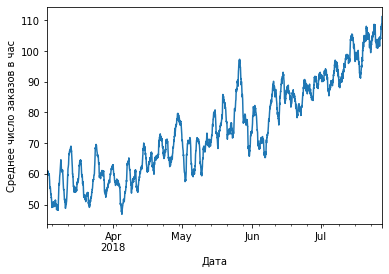

In [28]:
features_train['rolling_mean'].plot();

pl.xlabel('Дата');
pl.ylabel('Среднее число заказов в час');

### Вывод

Данные подготовлены к обучению моделей.

В тренировочных данных созданы признаки: календарные признаки, признак со "скользящим средним" количества заказов и данных о 300 предшествующих часах.

В итоге тренировочные данные содержат 308 признаков.

## Построение моделей

### Линейная регрессия

In [21]:
model_linear = LinearRegression().fit(features_train, target_train)
predict_linear = model_linear.predict(features_valid)
mse_linear = mean_squared_error(target_valid, predict_linear)
rmse_linear = mse_linear**0.5
print('Метрика RMSE модели линейной регрессии:', rmse_linear)

Метрика RMSE модели линейной регрессии: 34.308101503740836


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Здорово, что оценка по валидационной выборке.</font>

### Дерево решений

In [22]:
from tqdm import tqdm

rmse_tree = 100
model_tree = None

for depth2 in tqdm(range(1, 100)):
    model_tree_step = DecisionTreeRegressor(random_state=12345, max_depth=depth2)
    model_tree_step.fit(features_train, target_train)
    predict_tree = model_tree_step.predict(features_valid)
    mse_tree = mean_squared_error(target_valid, predict_tree)
    rmse_step = mse_tree**0.5
    
    if rmse_step < rmse_tree:
        rmse_tree = rmse_step
        model_tree = model_tree_step

print('Метрика RMSE модели дерева решений:', rmse_tree)
print()
print('Модель дерева решений:\n', model_tree)

100%|██████████| 99/99 [00:05<00:00, 18.82it/s]

Метрика RMSE модели дерева решений: 37.22114599025762

Модель дерева решений:
 DecisionTreeRegressor(max_depth=6, random_state=12345)


### Случайный лес

In [24]:
%%time

tscv = TimeSeriesSplit(n_splits=3)

gsearch = GridSearchCV(
    estimator=RandomForestRegressor(random_state=12345), 
    cv=tscv, 
    param_grid={'n_estimators': [1, 200], 'max_depth': [1, 200]})

gsearch.fit(features_train, target_train)
predict_gsearch = gsearch.predict(features_valid)
mse_gsearch = mean_squared_error(target_valid, predict_gsearch)
rmse_gsearch = mse_gsearch**0.5

print('Метрика RMSE модели случайного леса:', rmse_gsearch)
print()
print('Параметры лучшей модели:\n', gsearch.best_estimator_)

Метрика RMSE модели случайного леса: 31.865838155172668

Параметры лучшей модели:
 RandomForestRegressor(max_depth=200, n_estimators=200, random_state=12345)
CPU times: total: 17.5 s
Wall time: 17.5 s


In [25]:
model_forest = RandomForestRegressor(random_state=12345, n_estimators=200, max_depth=200)
model_forest.fit(features_train, target_train)
predict_forest = model_forest.predict(features_valid)
mse_forest = mean_squared_error(target_valid, predict_forest)
rmse_forest = mse_forest**0.5

print('Метрика RMSE модели случайного леса:', rmse_forest)

Метрика RMSE модели случайного леса: 31.865838155172668


### Вывод

Лучшее качество предсказаний имеет модель случайного леса.

Выберем её в качестве итоговой. Сохраним её в переменную `model`.

In [26]:
model = model_forest

## Проверка модели на тестовых данных

In [27]:
predict = model.predict(features_test)
mse = mean_squared_error(target_test, predict)
rmse = mse**0.5
print('Метрика RMSE модели на тестовых данных:', rmse)

Метрика RMSE модели на тестовых данных: 47.19813552823489


## Вывод

В результате данной работы подготовлена модель машинного обучения для предсказания количества заказов такси на следующий час. Метрика *RMSE* построенной модели на стестовых данных - 47.2 заказа, что ниже заданного заказчиком значения - 48 заказов.

В ходе работы были исследованы три модели, наилучший результат показала модель случайного леса.